# Spaceship Titanic: Exploratory Data Analysis and Preprocessing

Project: [Spaceship Titanic](https://www.kaggle.com/competitions/spaceship-titanic/overview)

In this notebook, we will:
- Load and inspect the dataset
- Understand the structure of the data (features, types, missing values)
- Feature engineer and preprocess the data, including encoding it.
- Explore distributions of key variables
- Analyze relationships between features and the target variable (`Transported`)
- Visualize important patterns and trends

Our goal here is to have two well preprocessed datasets to use for our modelling.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train_df = train.copy()
test_df = test.copy()

## Initial Data Exploration
- Here we get a broad overview over the features. Including data types, missing values and descriptive statistics.
- We look at both training and test set to ensure neither is too different.

In [2]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
# Info, showing us the both amount of data in each column and type.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64 

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


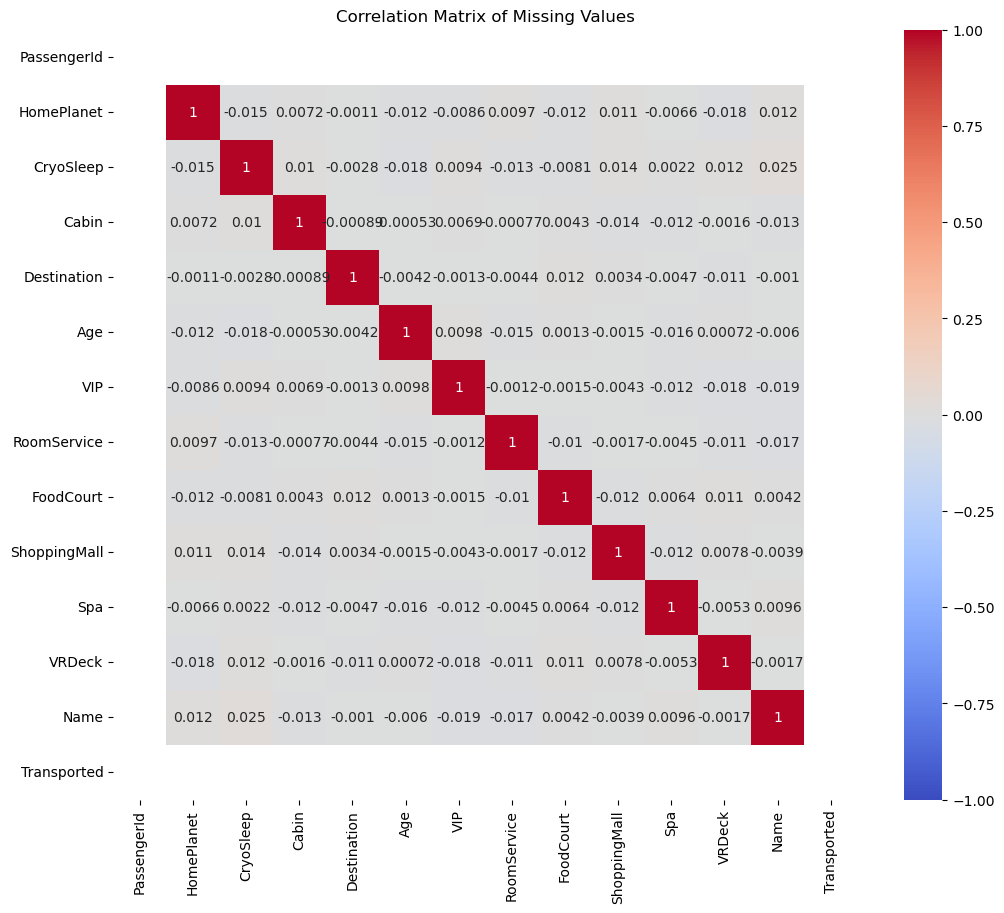

In [ ]:
# Checking for amount of missing values and possible patterns
print(train_df.isnull().sum(), "\n")
print(test_df.isnull().sum())

# making a correlation matrix for null values, to see if there are any patterns
null_df = train_df.isnull().astype(int) 
null_corr = null_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(null_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Missing Values")
plt.show()

In [5]:
# unique entries in columns
print(train_df.nunique(), "\n")
print(test_df.nunique())

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64 

PassengerId     4277
HomePlanet         3
CryoSleep          2
Cabin           3265
Destination        3
Age               79
VIP                2
RoomService      842
FoodCourt        902
ShoppingMall     715
Spa              833
VRDeck           796
Name            4176
dtype: int64


In [6]:
# Descriptive statistics of numerical features
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


#### Preliminary conclusions
- We see that we need to change alot of the features into a numeric data type.

- There is room for feature engineering, **Cabin** can be split into three seperate features **deck**, **number** and **side** and **PassengerId** can be split into **Group** and **Id**.

- **Name** and has dubious relevance given how many unique values there are, but only keeping the last names might be useful as it points to family connections, but just keeping last names might still be to high cardinality.

- Each feature seems to be missing about 2-3% of it's values. Correlation matrix of missing values point towards no pattern of missingness between the columns. Imputation might me useful.

- Age brackets might be a good idea

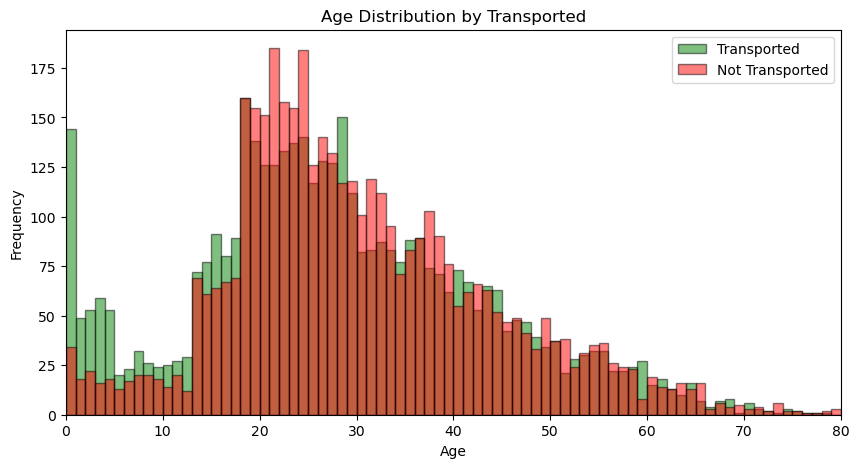

In [7]:
bins = np.arange(0, 82, 1)

transported = train_df[train_df['Transported'] == True]['Age'].dropna()
not_transported = train_df[train_df['Transported'] == False]['Age'].dropna()

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(transported, bins=bins, alpha=0.5, label='Transported', color='green', edgecolor='black', linewidth=1.0)
ax.hist(not_transported, bins=bins, alpha=0.5, label='Not Transported', color='red', edgecolor='black', linewidth=1.0)
ax.set_xlim(0, 80)
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title('Age Distribution by Transported')
ax.legend()

plt.show()

## Preprocessing, Feature engineering and Imputing:
Here we want to:
- Split up some columns, into more relevant features.
    - **PassengerId** into **Group** and then **Group** into **GroupSize**.
    - **Name** into **LastName** and then **LastName** into **FamilySize**.
- We set **Age** brackets, based on the visualization -> [0-4, 5-9, 10-14, 15-19, 20-29,30-39,40-49,50-59,60+]
- We do One-hot-encoding for the lower cardinality features, this works as 'imputation' for categorical aswell.
- For numerical imputing we look at the distribution and use domain knowledge.

In [8]:
# Preprocessing
def encode(df): # all preprocessing, feature engineering and imputing is done here.
    df_to_return = df.copy()
    
    #### FEATURE ENGINEERING
    ## Splitting features PassengerId, Cabin and Name
    df_to_return[['Group', 'Id']] = df_to_return['PassengerId'].str.split('_', expand=True).astype(int) # splits up passenger id into group and Id
    df_to_return[['Deck', 'Num', 'Side']] = df_to_return['Cabin'].str.split('/', expand=True).copy() # Splitting Cabin into three features
    df_to_return['LastName'] = df_to_return['Name'].str.split(' ').copy().str[1] # Keeping only the last name for the name column

    # Splitting age into brackets
    age_bins = [0, 5, 10, 15, 20, 30, 40, 50, 60, 100] # we use smaller bins at younger ages because there's more variation early on.
    age_labels = ["0-4", "5-9", "10-14", "15-19", "20-29", "30-39", "40-49", "50-59", "60+"]
    df_to_return['Age'] = pd.cut(df_to_return['Age'], bins=age_bins, labels=age_labels).copy() # Splitting age into age brackets

    # Feature engineer group and last name into a count for size of group and family
    df_to_return['FamilySize'] = df_to_return.groupby('LastName')['LastName'].transform('count')
    df_to_return['GroupSize'] = df_to_return.groupby('Group')['Group'].transform('count')


    ##### IMPUTING: we fillna(0) for the services, fits both distribution and 'domain knowledge', (missing value might mean no money was spent)
    #####           for Num we use a simple median as KNN imputer tends to mess up distriubtion. while median only makes a single spike
    df_to_return['Num'] = df_to_return['Num'].astype(float) #Convert NUM dtypes (else there will be error)
    df_to_return['Num'] = df_to_return['Num'].fillna(df_to_return['Num'].median())
    
    # for services we simply fill 0 at missing values, this most common.
    for col in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
        df_to_return[col] = df_to_return[col].fillna(0)
        
    # finally for family size, the safest assumption is that people missing their last name did not arrive with others. so we fillna(1)
    df_to_return['FamilySize'] = df_to_return['FamilySize'].fillna(1)
    
    
    #### ENCODING
    ### One Hot Encoding, One column for each category. # This takes care of categorical imputing, since it creates a feature for missing values
    cols_to_encode = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side', 'Age']
    enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    encoded_data = enc.fit_transform(df_to_return[cols_to_encode])

    encoded_df = pd.DataFrame(
        encoded_data,
        columns=enc.get_feature_names_out(cols_to_encode)
    )
    df_to_return = pd.concat([df_to_return, encoded_df], axis=1) # add back the new one hot encoded columns
    
    
    
    # Dropping all unused columns
    df_to_return.drop(columns=['Cabin', 'PassengerId', 'Name', 'LastName'] + cols_to_encode, inplace=True) # dropping the old features
    
    return df_to_return


# We now apply it to our training set:
train_df = encode(train_df)


## Exploratory Data Analysis

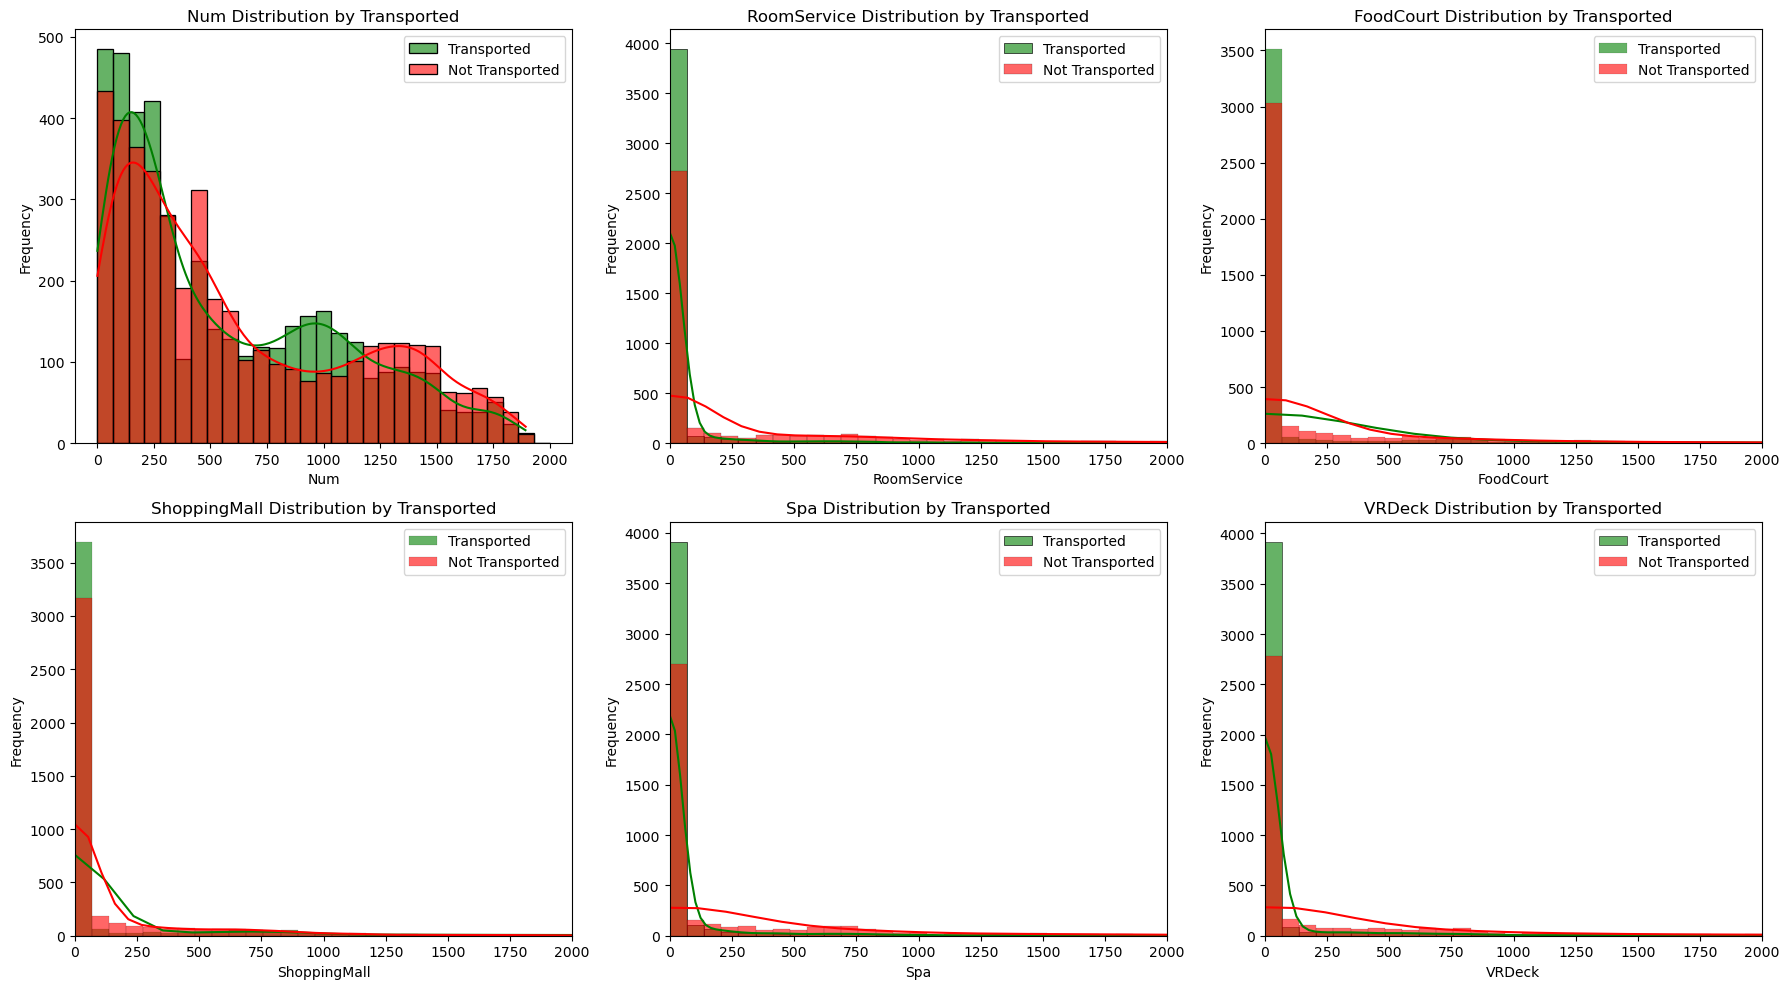

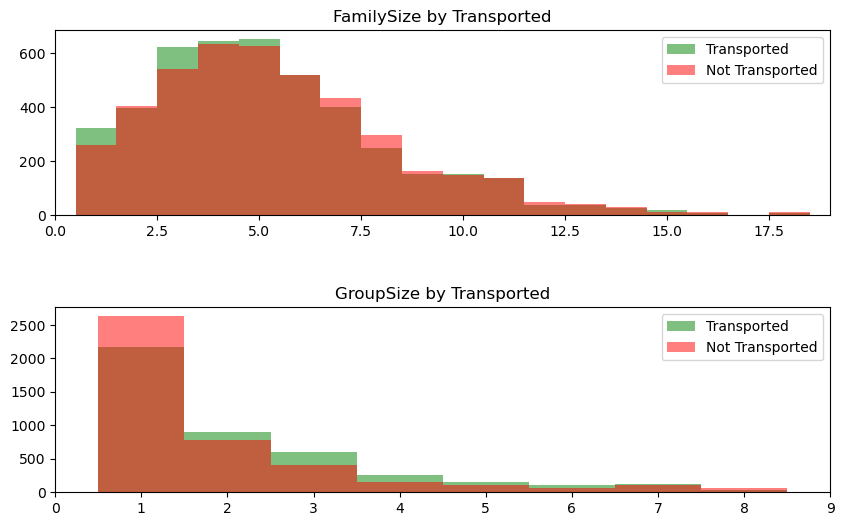

In [9]:
# Exploring the distribution of the numerical features

numeric_features = ['Num', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()
bins = np.linspace(0, 2000, 30)

for i, col in enumerate(numeric_features):
    
    sns.histplot(data=train_df[train_df['Transported'] == True], x=col, kde=True, bins=bins, ax=axes[i], color='green', label='Transported', alpha=0.6)
    sns.histplot(data=train_df[train_df['Transported'] == False], x=col, kde=True, bins=bins, ax=axes[i], color='red', label='Not Transported', alpha=0.6)
    
    if col != 'Num':
        axes[i].set_xlim(0, 2000)  # limit for heavy-tailed features
    axes[i].set_title(f'{col} Distribution by Transported')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.show()


# Family size and group size by transported
features = ['FamilySize', 'GroupSize']

fig, axes = plt.subplots(len(features), 1, figsize=(10, len(features) * 3))
plt.subplots_adjust(hspace=0.5)

for i, feature in enumerate(features):
    transported = train_df[train_df['Transported'] == True][feature]
    not_transported = train_df[train_df['Transported'] == False][feature]
    
    bins = np.arange(0, train_df[feature].max() + 2) - 0.5
    axes[i].hist(transported, bins=bins, alpha=0.5, label='Transported', color='green')
    axes[i].hist(not_transported, bins=bins, alpha=0.5, label='Not Transported', color='red')

    axes[i].set_xlim(0, train_df[feature].max() + 1)
    axes[i].set_title(f'{feature} by Transported')
    axes[i].legend()

plt.show()

#### Notes:
-  We justify from this visualization that we should impute 0 for missing values for all service features.
- Num shows a spike from the imputation.

In [10]:
train_df.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,Id,Num,FamilySize,...,Age_0-4,Age_10-14,Age_15-19,Age_20-29,Age_30-39,Age_40-49,Age_5-9,Age_50-59,Age_60+,Age_nan
0,0.0,0.0,0.0,0.0,0.0,False,1,1,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0,True,2,1,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,43.0,3576.0,0.0,6715.0,49.0,False,3,1,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1283.0,371.0,3329.0,193.0,False,3,2,0.0,6.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,303.0,70.0,151.0,565.0,2.0,True,4,1,1.0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   RoomService                8693 non-null   float64
 1   FoodCourt                  8693 non-null   float64
 2   ShoppingMall               8693 non-null   float64
 3   Spa                        8693 non-null   float64
 4   VRDeck                     8693 non-null   float64
 5   Transported                8693 non-null   bool   
 6   Group                      8693 non-null   int32  
 7   Id                         8693 non-null   int32  
 8   Num                        8693 non-null   float64
 9   FamilySize                 8693 non-null   float64
 10  GroupSize                  8693 non-null   int64  
 11  HomePlanet_Earth           8693 non-null   float64
 12  HomePlanet_Europa          8693 non-null   float64
 13  HomePlanet_Mars            8693 non-null   float

#### Note
- No missing values, all features are ready for modelling.

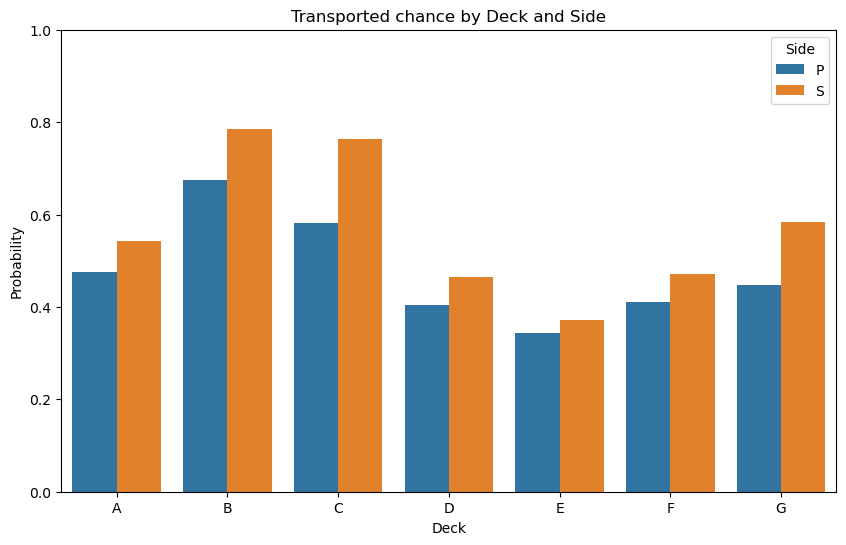

In [12]:
## Visualizing the chance of transportation based on deck and side of cabin.
plot_df = train_df.copy()

deck_cols = ['Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G']
side_cols = ['Side_P', 'Side_S']

plot_df['Deck'] = plot_df[deck_cols].idxmax(axis=1).str.replace('Deck_', '') # reverse on hot encoding for viualization
plot_df['Side'] = plot_df[side_cols].idxmax(axis=1).str.replace('Side_', '')

grouped = plot_df.groupby(['Deck', 'Side'])['Transported'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Deck', y='Transported', hue='Side', data=grouped)
plt.title('Transported chance by Deck and Side')
plt.ylabel('Probability')
plt.xlabel('Deck')
plt.ylim(0, 1)
plt.legend(title='Side')
plt.show()

##### Correlation matrix

In [13]:
# A Correlation matrix between all features
corr = train_df.corr('pearson', numeric_only=True)
corr.style.background_gradient(cmap ='coolwarm') \
    .format(precision=3) 

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,Id,Num,FamilySize,GroupSize,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_nan,CryoSleep_False,CryoSleep_True,CryoSleep_nan,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_nan,VIP_False,VIP_True,VIP_nan,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_nan,Side_P,Side_S,Side_nan,Age_0-4,Age_10-14,Age_15-19,Age_20-29,Age_30-39,Age_40-49,Age_5-9,Age_50-59,Age_60+,Age_nan
RoomService,1.000,-0.015,0.052,0.009,-0.019,-0.241,0.000,-0.022,-0.010,-0.030,-0.040,-0.138,-0.067,0.245,-0.005,0.241,-0.244,-0.001,-0.023,-0.063,0.061,-0.004,-0.050,0.057,0.014,-0.023,-0.065,-0.019,0.161,0.044,0.086,-0.145,0.008,0.027,0.007,-0.015,0.027,-0.065,-0.014,-0.006,0.019,0.049,0.019,-0.054,-0.005,0.012,-0.043
FoodCourt,-0.015,1.000,-0.014,0.221,0.225,0.046,-0.009,0.023,-0.180,-0.098,0.033,-0.209,0.365,-0.125,-0.018,0.203,-0.206,0.001,0.135,-0.065,-0.074,-0.011,-0.088,0.125,-0.002,0.119,0.155,0.258,0.020,-0.039,-0.132,-0.150,0.014,0.000,-0.020,0.020,0.000,-0.055,-0.050,-0.063,0.001,0.076,0.055,-0.045,0.032,0.011,-0.032
ShoppingMall,0.052,-0.014,1.000,0.015,-0.008,0.009,0.018,-0.039,0.002,-0.038,-0.039,-0.069,-0.021,0.112,-0.008,0.207,-0.208,-0.008,-0.014,-0.031,0.033,-0.006,0.001,0.018,-0.020,-0.017,-0.011,0.001,0.055,0.032,0.074,-0.109,-0.007,-0.010,0.021,-0.018,-0.010,-0.056,-0.003,0.026,0.026,0.008,0.016,-0.046,-0.011,-0.001,-0.041
Spa,0.009,0.221,0.015,1.000,0.148,-0.219,-0.005,0.017,-0.128,-0.064,0.019,-0.155,0.266,-0.088,-0.010,0.197,-0.198,-0.005,0.075,-0.053,-0.034,0.007,-0.038,0.061,-0.008,0.060,0.114,0.164,0.033,-0.012,-0.088,-0.124,0.036,0.026,-0.006,-0.002,0.026,-0.053,-0.043,-0.025,-0.022,0.061,0.036,-0.044,0.035,0.043,-0.024
VRDeck,-0.019,0.225,-0.008,0.148,1.000,-0.205,0.016,0.010,-0.136,-0.074,0.009,-0.153,0.283,-0.112,-0.002,0.190,-0.193,-0.002,0.090,-0.045,-0.047,-0.010,-0.087,0.123,-0.001,0.096,0.123,0.207,-0.004,-0.018,-0.095,-0.127,0.012,-0.007,0.009,-0.007,-0.007,-0.051,-0.041,-0.045,0.014,0.066,0.023,-0.042,0.035,-0.003,-0.029
Transported,-0.241,0.046,0.009,-0.219,-0.205,1.000,0.021,0.066,-0.045,-0.032,0.083,-0.169,0.177,0.020,0.003,-0.452,0.460,-0.005,0.109,0.000,-0.095,0.001,0.025,-0.037,0.003,-0.003,0.145,0.108,-0.034,-0.098,-0.088,0.016,-0.015,-0.000,-0.101,0.101,-0.000,0.088,0.032,-0.006,-0.046,-0.034,-0.004,0.029,-0.007,-0.010,0.063
Group,0.000,-0.009,0.018,-0.005,0.016,0.021,1.000,0.011,0.672,0.006,0.015,0.002,0.005,-0.009,0.002,0.004,-0.007,0.010,-0.001,0.014,-0.008,0.003,-0.017,0.014,0.010,0.009,-0.006,0.013,-0.008,-0.000,0.005,0.002,-0.016,-0.027,0.011,-0.002,-0.027,-0.003,-0.000,0.006,0.012,0.012,-0.011,-0.007,-0.005,-0.019,-0.014
Id,-0.022,0.023,-0.039,0.017,0.010,0.066,0.011,1.000,-0.042,0.251,0.757,-0.073,0.099,-0.015,0.002,-0.063,0.063,0.002,0.050,-0.047,-0.014,-0.001,0.002,0.001,-0.004,0.027,0.062,0.079,0.002,-0.042,-0.106,0.036,-0.012,0.009,-0.012,0.009,0.009,0.150,0.030,-0.035,-0.083,-0.036,-0.021,0.143,-0.006,-0.016,0.089
Num,-0.010,-0.180,0.002,-0.128,-0.136,-0.045,0.672,-0.042,1.000,0.133,-0.050,0.362,-0.484,0.062,0.016,0.037,-0.038,0.001,-0.141,0.104,0.058,-0.000,0.059,-0.097,0.014,-0.187,-0.267,-0.260,-0.216,-0.196,0.446,0.196,-0.028,-0.051,0.045,-0.030,-0.051,0.046,0.023,0.079,0.012,-0.056,-0.058,0.038,-0.045,-0.026,0.012
FamilySize,-0.030,-0.098,-0.038,-0.064,-0.074,-0.032,0.006,0.251,0.133,1.000,0.328,0.272,-0.215,-0.106,-0.004,0.006,-0.007,0.000,-0.043,0.071,-0.005,-0.003,0.039,-0.057,0.002,-0.065,-0.110,-0.103,-0.084,-0.033,0.025,0.198,-0.027,-0.005,0.007,-0.005,-0.005,0.115,0.025,0.026,-0.046,-0.063,-0.019,0.074,-0.033,-0.006,0.065


#### Gini Importance

In [20]:
## Finding the most important features using Gini Impurity

X = train_df.drop(columns=['Transported'])  # drop the target column
y = train_df['Transported']

model = RandomForestClassifier()
model.fit(X, y)

# get the feature importance
importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df.head(20)

,Feature,Importance
7,Num,0.094430
5,Group,0.092989
3,Spa,0.086395
4,VRDeck,0.074663
0,RoomService,0.073466
1,FoodCourt,0.070283
2,ShoppingMall,0.061363
15,CryoSleep_True,0.061030
8,FamilySize,0.054550
14,CryoSleep_False,0.053500


- The numerical seem to be outperforming the one hot encoded categorical.

#### Testing KNNImputing

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

df_y = train_df['Transported']
df_x = train_df.drop(columns=['Transported'])

train_x, val_x, train_y, val_y = train_test_split(df_x,df_y, test_size=0.3, random_state=42, shuffle=True)

In [16]:
## Testing KNNImputer on numerical features. (Comment out imputing parts of encoding() before running)
from sklearn.impute import KNNImputer


pipeline = make_pipeline(KNNImputer(), RandomForestClassifier(n_estimators=500))
pipeline.fit(train_x, train_y)

rf_pred = pipeline.predict(val_x)
rf_accuracy = accuracy_score(val_y, rf_pred)
print("With KNNImputer: ", rf_accuracy)

model = RandomForestClassifier(n_estimators=500)
model.fit(train_x, train_y)
prediction = model.predict(val_x)
print("Without KNNImputer: ", accuracy_score(val_y, prediction))

With KNNImputer:  0.7952453987730062
Without KNNImputer:  0.7986963190184049


#### Results:
- KNN Imputing seem to perform either just as good or worse. Note that accuracy variance is high in this example. 

## Saving Processed Dataset
- Comment out code to save the dataset to /data/
- Warning: will overwrite current files by same name.

In [17]:
train_df = encode(train)
test_df = encode(test)

# saves the processed DFs
train_df.to_csv('data/processed_train.csv', index=False)
test_df.to_csv('data/processed_test.csv', index=False)